In [9]:
import pandas as pd
import numpy as np

In [117]:
# import Billy Barr data
filepath = r"C:\Users\dlhogan\OneDrive - UW\Documents\winter-quarter-2022\billy-barr-all.dat"
bb_data = pd.read_csv(filepath, skiprows=1)

C:\Users\dlhogan\anaconda3\envs\radiative_transfer\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [204]:
from datetime import datetime 
import matplotlib.pyplot as plt

In [164]:
min_temps_df = bb_data[['Date   ',' Mn Air']].loc[1:]
min_temps_df2 = min_temps_df.copy()
min_temps_df2[' Mn Air'] = min_temps_df[' Mn Air'].astype(float)

mask = min_temps_df2[' Mn Air'] > -39.0

min_temps_df2 = min_temps_df2[mask]


In [190]:
daily_mins = min_temps_df2.groupby('Date   ').min()
daily_mins.index = [datetime.strptime(date, '%Y/%m/%d') for date in daily_mins.index]

In [214]:
annual_mins = daily_mins.groupby(daily_mins.index.year).min()

In [195]:
winter_mask = daily_mins.index.month.isin([1,2,3,11,12])
daily_mins = daily_mins[winter_mask]


In [215]:
annual_mins

,Mn Air
2009,-17.40
2010,-23.05
2011,-31.89
2012,-21.63
2013,-24.20
2014,-19.54
2015,-17.40
2016,-23.66
2017,-24.11
2018,-18.57


Text(0.5, 1.0, 'billy barr cabin annual min temp: 2009-2022')

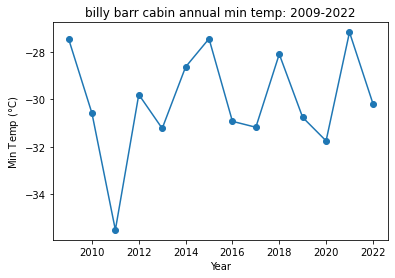

In [224]:
fig, ax = plt.subplots()
fig.set_facecolor('w')
daily_mins_C =(annual_mins[' Mn Air'] - 32) * 5 / 9
ax.plot(annual_mins.index,daily_mins_C, marker='o')
ax.set_ylabel('Min Temp ($\degree$C)')
ax.set_xlabel('Year')
ax.set_title('billy barr cabin annual min temp: 2009-2022')



In [198]:
daily_mins[' Mn Air'].median()

5.657